# Finding Healthy Fast Foods and  Restaurants:

Project By: Ali Motamednejad<br>
Date: Apr 2023

## Project Description:

The target is to get the healthiest among a list of food served in some restaurants. It has always been my concern to eat healthy meals and getting good amount of energy.<br>
The results of this project can also be useful for the people who are interested in healthy foods and finding the restaurants which serve healthy meals.


## Definition of Healthy food:

Generally, healthy foods include less salt, sugar and fat. On the other hand,they have more vitamin, calcium, protein and fiber. <br>
They also leave more feeling of full.


## Libraries:

In [29]:
#  For Analysis
import numpy as np
import pandas as pd
import math
import re

#  For Visualization
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.ticker import FixedLocator
import matplotlib.colors as mcolors

#  For Reporting
from IPython.display import display, Markdown, HTML
from PIL import Image

## Loading Data

In [30]:
df_food = pd.read_csv('C:/One Drive/OneDrive/Desktop/Data Science/Hamideh/1/data_fastfood_calories.csv')
df_sale = pd.read_csv('C:/One Drive/OneDrive/Desktop/Data Science/Hamideh/1/data_fastfood_sales.csv')

## The initial Observation of the Data:

### Fast Food Data:

In [31]:
df_food.sample(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
204,Burger King,Extra Long Cheeseburger,580,300,33,13.0,1.5,85,1030,45,2.0,9,26.0,NaN,NaN,NaN
191,Arbys,Super Greek Salad,720,480,53,15.0,0.0,85,1310,39,5.0,7,22.0,NaN,NaN,NaN
57,Chick Fil-A,Chargrilled Chicken Club Sandwich,430,144,16,8.0,0.0,85,1120,37,3.0,7,37.0,30.0,40.0,25.0
388,Subway,Sweet Onion Chicken Teriyaki Salad,200,25,3,1.0,0.0,50,660,24,4.0,16,20.0,25.0,50.0,6.0
207,Burger King,Homestyle Cheeseburger,550,250,27,12.0,1.5,95,1140,48,2.0,10,30.0,NaN,NaN,NaN
454,Taco Bell,Chalupa Supreme® - Chicken,340,160,18,4.0,0.0,40,530,29,3.0,4,16.0,NaN,NaN,NaN
497,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN
230,Burger King,Garden Grilled Chicken Salad w/ Grilled Chicke...,320,120,14,6.0,0.0,115,650,16,2.0,4,36.0,NaN,NaN,NaN
237,Burger King,BK VEGGIE Burger,410,150,16,3.0,0.0,5,1030,44,7.0,8,22.0,NaN,NaN,NaN
194,Burger King,Bacon Cheeseburger,330,140,16,7.0,0.0,55,830,32,1.0,7,18.0,NaN,NaN,NaN


### Sale Data:

In [32]:
title = "<h2 style='text-align:left;'><b><u><font color='purple'>Sample of Sale Dataframe</font></u></b></h2>"
centered_title = title.center(80)  # Adjust the width as needed

display(HTML(centered_title))
display(df_sale.sample(10))


,restaurant,average_sales,us_sales,num_company_stores,num_franchised_stores,unit_count
4,Pizza Hut,900.00,5510.84,96,7426,7522
16,Chipotle,1940.00,4476.41,2371,0,2371
14,Jimmy Johns,796.97,2139.62,55,2700,2755
8,Dominos,1000.00,5900.00,392,5195,5587
2,Starbucks,945.27,13167.61,8222,5708,13930
7,Wendys,1610.00,9288.09,337,5432,5759
0,Subway,416.86,10800.00,0,25908,25908
11,Sonic,1250.00,4408.16,228,3365,3593
13,Papa Johns,968.45,3209.30,708,2606,3314
18,Popeyes,1440.19,3213.06,53,2178,2231


## The investigation of the relationship between different variables:

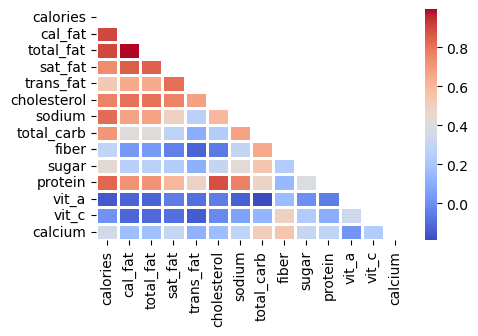

In [33]:
plt.figure(figsize=(5, 3))
mask = np.triu(np.ones_like(df_food.corr(numeric_only = True), dtype=bool))
sns.heatmap(df_food.corr(numeric_only = True),lw=1,cmap="coolwarm",mask=mask)

plt.show()

Based on the heatmap:
    
- It uses colors to represent the values of the variables. The warmer colors indicate higher values and cooler colors indicate lower values. 
- Each row and column corresponds to a specific food compounds in the dataset.
- By analyzing the heatmap, patterns and correlations could be identified between the variables. For example, there is a strong positive correlation between calorie and fat content, it means the more value of fat in the meals, the more calories one can obtain. 
 

### Findings:

1- There are no considerable relationship between Vitamins, Calcium, Protein, Fiber and Calorie<br><br>
2- There are strong positive correlations between cholesterol, fat, sodium, and calorie. It means the higher values of cholesterol in a meal, the higher values of fat, sodium, and calorie.<br><br>
For example "American Brewhouse King" has high values of cal_fat, cholestrol, sodium and calorie and negligible amount of vitamin, calcium and fiber.However, "Grilled Chicken Garden Greens Salad" has low amount of Cholesterol, fat and Calorie.


## Optimizing the Variables:

Regarding many variables in this dataset, it is better to study on possibility of optimizing them.<br>
On the first step, the relationship of "cal_fat", "total_fat", "sat_fat", "trans_fat" and "cholestrol" is investigated: 

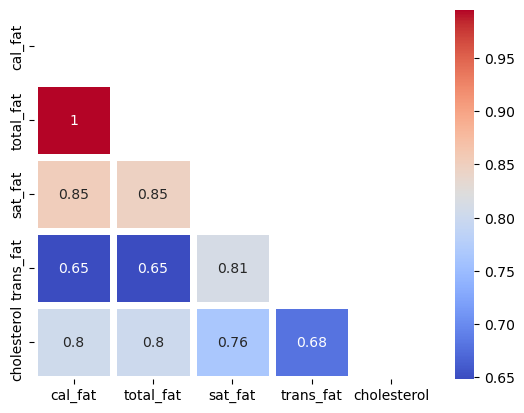

In [34]:
df_fat = df_food[['cal_fat','total_fat','sat_fat','trans_fat','cholesterol']]

mask = np.triu(np.ones_like(df_fat.corr(), dtype=bool))

sns.heatmap(df_fat.corr(numeric_only = True),lw=5,cmap="coolwarm",annot=True,mask=mask)

plt.show()

### Findings:

Cholestrol will be considered as a representative variable among other kind of fats, because of strong correlation. 

## Removing foods which are for more than a person (Meals contain 5 pieces and more)

In [35]:
df_food1 = df_food[df_food['item'].str.contains('[5-9]\s*[P p]iece|[1-9]\d+\s*[P p]iece') == False]
print("There are",str(len(df_food1.index)),"foods for one person in the dataframe")

There are 491 foods for one person in the dataframe


In [36]:
df_food1.sample(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
321,Subway,"6"" Chicken Pizziola Melt",460,140,16,6.0,0.0,80,1140,49,6.0,9,32.0,15.0,30.0,45.0
198,Burger King,BBQ Bacon King,1100,675,75,29.0,3.0,220,1850,51,NaN,13,57.0,NaN,NaN,NaN
364,Subway,"6"" Veggie Delite",230,20,3,1.0,0.0,0,310,44,5.0,6,8.0,8.0,20.0,30.0
32,Mcdonalds,Grilled Sweet BBQ Bacon Chicken Sandwich,630,200,22,7.0,0.0,135,1930,61,4.0,18,48.0,4.0,30.0,25.0
253,Burger King,Original Chicken Sandwich,630,350,39,7.0,1.0,65,1390,46,3.0,4,24.0,NaN,NaN,NaN
474,Taco Bell,Gordita Supreme® - Chicken,270,90,10,4.0,0.0,40,510,29,2.0,6,16.0,NaN,NaN,NaN
376,Subway,Chicken & Bacon Ranch Melt Salad (includes Ran...,510,340,38,12.0,1.0,100,1040,14,4.0,7,30.0,60.0,60.0,30.0
84,Sonic,Hatch Green Chile Cheeseburger,710,380,43,17.0,2.0,120,1120,44,2.0,7,35.0,10.0,25.0,30.0
114,Sonic,Buffalo Dunked Ultimate Chicken Sandwich,1000,550,61,12.0,0.5,125,4520,70,5.0,12,23.0,NaN,NaN,NaN
331,Subway,"6"" Meatball Marinara",480,160,18,7.0,1.0,30,950,59,8.0,12,21.0,25.0,35.0,35.0


## Comparison of different restaurants based on sodium in the meals:

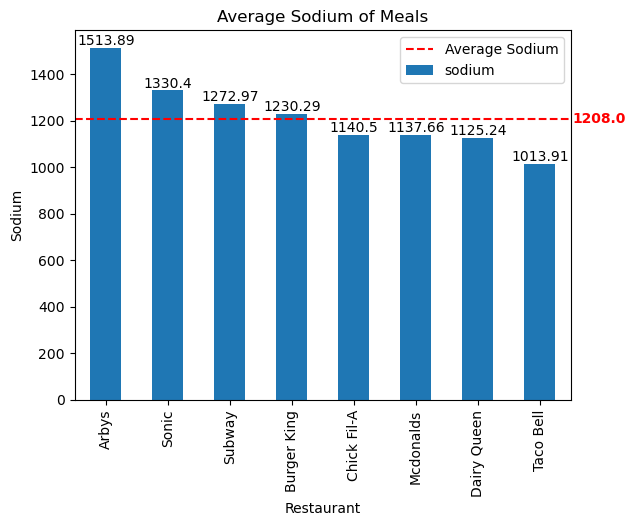

In [37]:
average_sodium = df_food1['sodium'].mean()
ax = df_food1.groupby(['restaurant'])['sodium'].mean().sort_values(ascending=False).plot(kind='bar')
ax.set_ylabel('Sodium')
ax.set_xlabel('Restaurant')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Average Sodium of Meals')

# Add a horizontal line for the average sodium
ax.axhline(y=average_sodium, color='red', linestyle='--', label='Average Sodium')

# Add the value of average sodium on the vertical axis
ax.text(ax.get_xlim()[1] + 0.02, average_sodium, f'{average_sodium:.1f}', ha='left', va='center', color='red', fontweight='bold')# Show the legend
ax.legend()

plt.show()

In [38]:
# Create the pivot table
pivot_table = df_food1.pivot_table(values=['cholesterol', 'sodium', 'calories', 'sugar'],
                                   index='restaurant',
                                   aggfunc={'cholesterol': 'mean', 'sodium': 'median', 'calories': 'mean', 'sugar': 'mean'})

pivot_table = pivot_table.rename(columns={'calories': 'Average<br>Calories', 'sodium': 'Average<br>Sodium', 'cholesterol': 'Average<br>Cholesterol', 'sugar': 'Average<br>Sugar'})

# Define a function to apply the desired color formatting
def color_formatting(val, col_avg):
    if val > col_avg:
        return 'color: red'
    else:
        return 'color: blue'

# Formatting and decoration
formatted_pivot_table = pivot_table.style \
    .format({'Average<br>Calories': '{:.1f}', 'Average<br>Sodium': '{:.1f}', 'Average<br>Cholesterol': '{:.1f}', 'Average<br>Sugar': '{:.1f}'}) \
    .apply(lambda col: [color_formatting(val, col.mean()) for val in col], subset=pd.IndexSlice[:, ['Average<br>Calories', 'Average<br>Sodium', 'Average<br>Cholesterol', 'Average<br>Sugar']])

formatted_pivot_table = formatted_pivot_table.set_properties(**{'font-size': '10pt', 'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}]) \
    .set_caption('Pivot Table - The Average Compounds of Meals')

# Add the note
formatted_pivot_table = formatted_pivot_table.set_caption('Pivot Table - The Average Compounds of Meals<br><br>Note: Red values are greater than the average of each column and blue ones are smaller')

# Display the formatted pivot table
formatted_pivot_table


,AverageCalories,AverageCholesterol,AverageSodium,AverageSugar
restaurant,,,,
Arbys,531.5,70.4,1470.0,7.7
Burger King,608.2,101.3,1150.0,8.4
Chick Fil-A,405.5,69.5,1125.0,5.4
Dairy Queen,502.2,70.4,1020.0,6.4
Mcdonalds,524.7,87.6,1090.0,10.2
Sonic,625.4,88.6,1220.0,6.7
Subway,503.0,61.3,1130.0,10.1
Taco Bell,443.7,39.0,960.0,3.7


## Scatter Diagram Based on Calories, Cholestrol and Sodium:

In [39]:
fig = px.scatter(df_food1, 'cholesterol', 'calories',  color='restaurant', size='sodium', hover_data='item')

# calculate quartiles and interquartile range
q1_x, q3_x = df_food1['cholesterol'].quantile([0.1, 0.9])
iqr_x = q3_x - q1_x
q1_y, q3_y = df_food1['calories'].quantile([0.25, 0.75])
iqr_y = q3_y - q1_y

# identify outliers
x_outliers = (df_food1['cholesterol'] < q1_x - 1.5*iqr_x) | (df_food1['cholesterol'] > q3_x + 1.5*iqr_x)
y_outliers =    (df_food1['calories'] < q1_y - 1.5*iqr_y) | (df_food1['calories']    > q3_y + 1.5*iqr_y)
xy_outliers = df_food1[x_outliers & y_outliers]

# add annotations for outliers
for index, row in xy_outliers.iterrows():
    fig.add_annotation(
        x=row['cholesterol'], y=row['calories'], text=row['item'],
        showarrow=True, arrowhead=1, ax=-50, ay=-40
    )

fig.show()

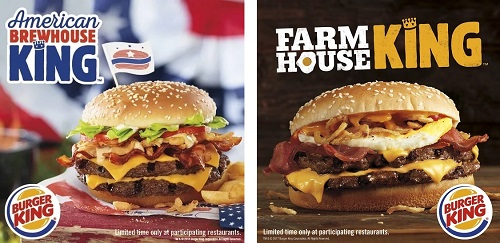

### Removing Outliers From Previous Scatter Diagram:

In [40]:
fig = px.scatter(df_food1[(df_food1['cholesterol'] < 200) & (df_food1['calories'] < 1400)], 'cholesterol', 'calories',  color='restaurant', size='sodium', hover_data='item')
fig.show()

## Assumptions:

1- The foods with cholesterol<300 and calorie>1000 are considered as low fat and energetic meals<br><br>
2- The foods containing more than 2,300 mg sodium is considered as non-healthy meals because adults limit sodium intake is less than 2,300 mg per day.<br><br>
3- The criteria for healthy and energetic food will be as follow:<br>
        sodium < 2300<br>
        cholesterol < 300<br>
        calorie > 1000<br>
        



## The number of healthy and energetic foods in data set:

In [41]:
# https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/
filtered = df_food1.query('calories > 1000 & cholesterol<300 & sodium<2300')
len(filtered. index)

# df_unhealthy
 
print(str(len(filtered. index)) + " Meals out of " + str(len(df_food1. index)) + " Meals are Considered Healthy" + " ("+ str(round(len(filtered. index)/len(df_food1. index),2)*100)+"%"+")")
# darsad

13 Meals out of 491 Meals are Considered Healthy (3.0%)


## Healthy foods:

In [42]:
fig = px.scatter(filtered, 'sodium', 'calories',  color='restaurant', size='cholesterol', hover_data='item')

for i, row in filtered.iterrows():
    
    if row['item']=='Super Sonic Double Cheeseburger W/ Mustard':
        fig.add_annotation(x=row['sodium'], y=row['calories'], text=row['item'], showarrow=True,
                       arrowhead=2, ax=95, ay=95, font=dict(size=8))
    elif row['item']=='Super Sonic Jalapeno Double Cheeseburger':
        fig.add_annotation(x=row['sodium'], y=row['calories'], text=row['item'], showarrow=True,
                       arrowhead=2, ax=40, ay=-40, font=dict(size=8))
    else:
        fig.add_annotation(x=row['sodium'], y=row['calories'], text=row['item'], showarrow=True,
                       arrowhead=2, ax=45, ay=45, font=dict(size=8))

fig.show()

## Salads:

In [43]:
df_salad = df_food[df_food['item'].str.contains("salad", flags=re.IGNORECASE) == True]
print("There are",len(df_salad. index),"salads in the dataset")
df_salad.sample(10)

There are 64 salads in the dataset


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
188,Arbys,Crispy Chicken Farmhouse Salad,430,220,24,8.0,0.0,65,1000,26,4.0,4,28.0,60.0,20.0,25.0
392,Subway,Veggie Delite Salad,50,10,1,0.0,0.0,0,65,9,4.0,4,3.0,25.0,45.0,4.0
160,Arbys,Pecan Chicken Salad Sandwich,840,400,44,6.0,0.5,75,1210,81,6.0,20,33.0,10.0,8.0,25.0
54,Mcdonalds,Premium Southwest Salad w/o Chicken,220,90,10,3.5,0.0,15,500,26,6.0,9,8.0,180.0,40.0,20.0
497,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN
388,Subway,Sweet Onion Chicken Teriyaki Salad,200,25,3,1.0,0.0,50,660,24,4.0,16,20.0,25.0,50.0,6.0
233,Burger King,Side Garden Salad and Avocado Ranch Dressing,230,190,21,5.0,0.0,30,520,7,2.0,3,5.0,NaN,NaN,NaN
228,Burger King,"Chicken, Apple & Cranberry Salad w/ Grilled Ch...",560,270,30,7.0,0.0,90,980,40,4.0,34,29.0,NaN,NaN,NaN
53,Mcdonalds,Premium Bacon Ranch Salad w/ Crispy Chicken,490,250,28,8.0,0.0,95,1120,28,4.0,4,33.0,180.0,60.0,15.0
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN


In [44]:
fig = px.scatter(df_salad, 'calories', 'cholesterol',  color='restaurant', size='sodium', hover_data='item')
for i, row in df_salad.iterrows():
    
    if row['cholesterol']==150:
        fig.add_annotation(x=row['calories'], y=row['cholesterol'], text=row['item'], showarrow=True,
                       arrowhead=2, ax=-40, ay=40, font=dict(size=10))
        
    elif row['calories']==840:
        fig.add_annotation(x=row['calories'], y=row['cholesterol'], text=row['item'], showarrow=True,
                       arrowhead=2, ax=-20, ay=80, font=dict(size=10))
fig.show()

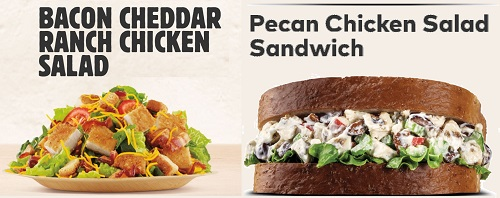

## Comparison of restaurants based on Sodium, Sugar and Cholestrol of the Meals:

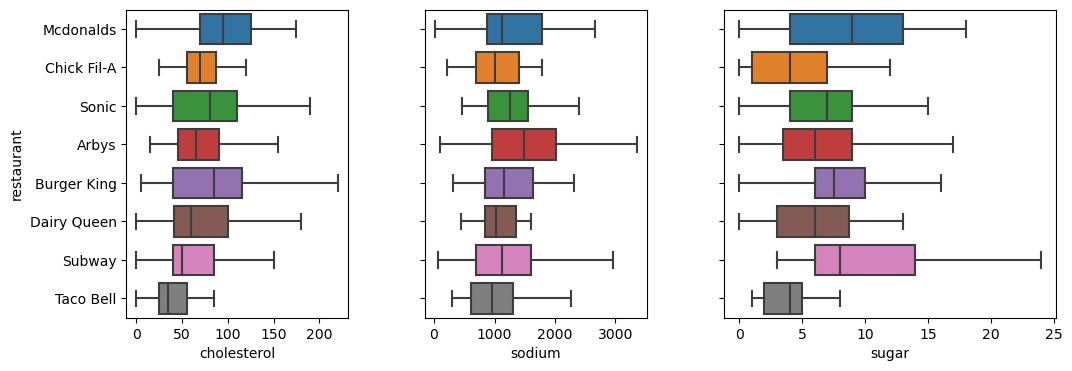

In [45]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 2, 3]})

sns.boxplot(y='restaurant', x='cholesterol', data=df_food, ax=axs[0], showfliers=False)
sns.boxplot(y='restaurant', x='sodium', data=df_food, ax=axs[1], showfliers=False)
sns.boxplot(y='restaurant', x='sugar', data=df_food, ax=axs[2], showfliers=False)

axs[0].xaxis.set_major_locator(FixedLocator(axs[0].get_xticks()))
axs[0].tick_params(axis='y', labelleft=True)

axs[1].xaxis.set_major_locator(FixedLocator(axs[1].get_xticks()))
axs[1].tick_params(axis='y', labelleft=False)

axs[2].xaxis.set_major_locator(FixedLocator(axs[2].get_xticks()))
axs[2].tick_params(axis='y', labelleft=False)

axs[1].set_ylabel('')  # Hide y-axis label for the second plot
axs[2].set_ylabel('')  # Hide y-axis label for the third plot

axs[0].set_title('')  # Remove title for the first plot
axs[1].set_title('')  # Remove title for the second plot
axs[2].set_title('')  # Remove title for the third plot

plt.subplots_adjust(wspace=0.3)  # Adjust the spacing between subplots

plt.show()



## Comparison of Average Sales of the Restaurants:

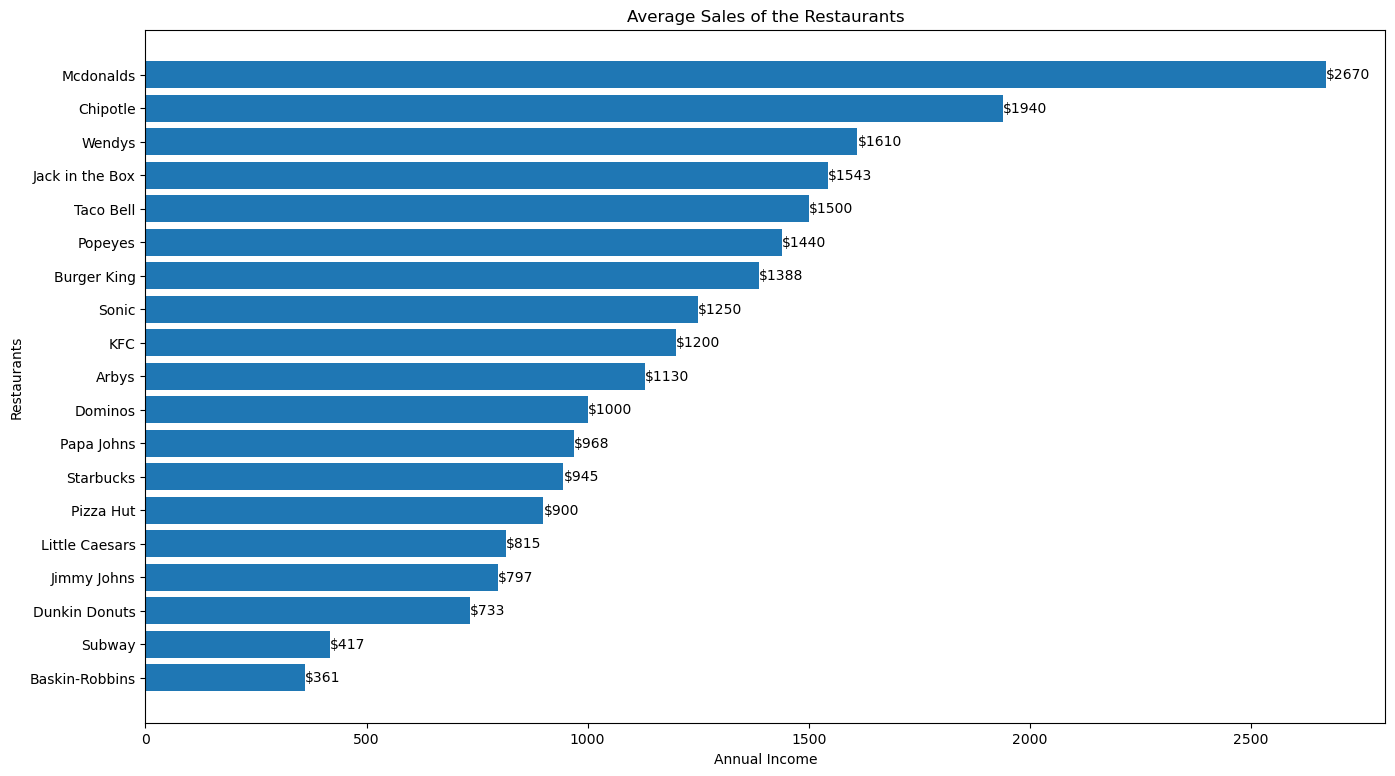

In [46]:
df_sale_sorted = df_sale.sort_values('average_sales', ascending=True)
num_bars = len(df_sale_sorted)
fig, ax = plt.subplots(figsize=(16, 9))
ax.barh(df_sale_sorted['restaurant'], df_sale_sorted['average_sales'])
plt.xlabel('Annual Income')
plt.ylabel('Restaurants')
plt.title('Average Sales of the Restaurants')
for i, v in enumerate(df_sale_sorted['average_sales']):
    ax.text(v, i, '${:.0f}'.format(v), ha='left', va='center')
plt.show()

## Extracting Veggie and Regular Foods:

In [47]:
df_veggie = df_food1[df_food1['item'].str.contains('Veg',flags=re.IGNORECASE) == True]
print("There are",str(len(df_veggie.index)),"veggie foods in the dataframe")

There are 13 veggie foods in the dataframe


In [48]:
title = "<h2 style='text-align:center;'><b><u><font color='purple'>Sample of Veggie Items (13 rows)</font></u></b></h2>"
centered_title = title.center(80)  # Adjust the width as needed

display(HTML(centered_title))
display(df_veggie.sample(13))

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
237,Burger King,BK VEGGIE Burger,410,150,16,3.0,0.0,5,1030,44,7.0,8,22.0,NaN,NaN,NaN
365,Subway,Footlong Veggie Delite,460,40,6,2.0,0.0,0,620,88,10.0,12,16.0,16.0,40.0,60.0
412,Taco Bell,Cantina Power Burrito - Veggie,740,230,26,5.0,0.0,10,1750,107,17.0,8,20.0,NaN,NaN,NaN
364,Subway,"6"" Veggie Delite",230,20,3,1.0,0.0,0,310,44,5.0,6,8.0,8.0,20.0,30.0
487,Taco Bell,Cantina Power Bowl - Veggie,540,190,21,3.0,0.0,10,1310,75,14.0,4,14.0,NaN,NaN,NaN
392,Subway,Veggie Delite Salad,50,10,1,0.0,0.0,0,65,9,4.0,4,3.0,25.0,45.0,4.0
103,Sonic,Veggie Burger W/ Ketchup,450,130,14,4.0,0.0,10,1410,67,5.0,11,15.0,6.0,8.0,25.0
367,Subway,Footlong Veggie Patty,780,140,14,2.0,0.0,20,1600,112,16.0,16,46.0,30.0,20.0,70.0
366,Subway,"6"" Veggie Patty",390,70,7,1.0,0.0,10,800,56,8.0,8,23.0,15.0,20.0,35.0
104,Sonic,Veggie Burger With Mustard,450,130,14,4.0,0.0,10,1350,64,5.0,8,15.0,6.0,8.0,27.0


In [49]:
df_regular = df_food1[df_food1['item'].str.contains('Veg',flags=re.IGNORECASE) == False]
print("There are",str(len(df_regular.index)),"regular foods (for one person) in the dataframe")

There are 478 regular foods (for one person) in the dataframe


## Study on Veggie Food:

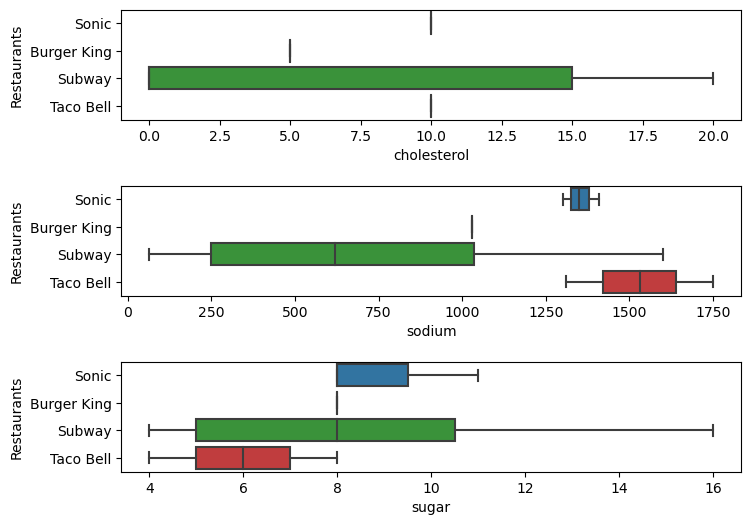

In [50]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(8, 6), sharey=True)

sns.boxplot(y='restaurant', x='cholesterol', data=df_veggie, ax=axs[0], showfliers=False)
sns.boxplot(y='restaurant', x='sodium', data=df_veggie, ax=axs[1], showfliers=False)
sns.boxplot(y='restaurant', x='sugar', data=df_veggie, ax=axs[2], showfliers=False)

axs[0].xaxis.set_major_locator(FixedLocator(axs[0].get_xticks()))
axs[0].tick_params(axis='y', labelleft=True)

axs[1].xaxis.set_major_locator(FixedLocator(axs[1].get_xticks()))
axs[1].tick_params(axis='y', labelleft=True)

axs[2].xaxis.set_major_locator(FixedLocator(axs[2].get_xticks()))
axs[2].tick_params(axis='y', labelleft=True)

axs[0].set_ylabel('Restaurants')
axs[1].set_ylabel('Restaurants')
axs[2].set_ylabel('Restaurants')

plt.subplots_adjust(hspace=0.6)  # Adjust the spacing between subplots

plt.show()


In [51]:
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd

# Create subplots with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Ordinary", "Giant"), horizontal_spacing=0.1,
                       column_widths=[0.45, 0.45], shared_yaxes=False,
                       specs=[[{'type': 'scatter'}, {'type': 'scatter'}]])

# Add the first scatter plot to the first subplot and customize hover information
df_sale_ord=df_sale[df_sale['us_sales'] < 5000]
fig.add_trace(go.Scatter(x=df_sale_ord['unit_count'], y=df_sale_ord['us_sales'], mode='markers',
                         marker=dict(size=15, color=df_sale_ord['average_sales'], showscale=True,
                                     colorbar=dict(x=-0.25, y=0.5, title='Average Sales')),
                         hovertemplate='%{text}<br>Average Sale: %{customdata}',
                         text=df_sale_ord['restaurant'],
                         customdata=df_sale_ord['average_sales'],
                         showlegend=False),
              row=1, col=1)

# Add the second scatter plot to the second subplot and customize hover information
df_sale_gia=df_sale[df_sale['us_sales'] >= 5000]
fig.add_trace(go.Scatter(x=df_sale_gia['unit_count'], y=df_sale_gia['us_sales'], mode='markers',
                         marker=dict(size=15, color=df_sale_gia['average_sales'], showscale=True,
                                     colorbar=dict(x=1.05, y=0.5, title='Average Sales')),
                         hovertemplate='%{text}<br>Average Sale: %{customdata}',
                         text=df_sale_gia['restaurant'],
                         customdata=df_sale_gia['average_sales'],
                         showlegend=False),
              row=1, col=2)

# Update the layout of the subplots with axis titles
fig.update_layout(height=500, width=900)

# Add y-axis titles to subplots
fig.update_yaxes(title_text="US Sales", row=1, col=1)

# Add x-axis titles to subplots
fig.update_xaxes(title_text="Unit Count", row=1, col=1)
fig.update_xaxes(title_text="Unit Count", row=1, col=2)

# Show the combined scatter plots
fig.show()
